In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv('/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Converting Total charges column to float datatype as Total charges can't be an object datatype
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df.fillna(df['TotalCharges'].mean(),inplace=True)
print(df.isnull().sum())
print(df.shape)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
(7043, 21)


**A:DATA MANIPULATION**

In [9]:
# a)Find the total number of male customers
a=df[df['gender']=='Male']
print(a.shape[0])

# or
print('Total Number of Male customers: ',df[df['gender']=='Male'].shape[0])

# or
b=sum(df['gender']=='Male')
print('Total Number of Male Cutsomers: ',b)



3555
Total Number of Male customers:  3555
Total Number of Male Cutsomers:  3555


In [10]:
#b)Find the total number of customers whose Internet Service is ‘DSL’
a=df[df['InternetService']=='DSL']
print('Total number of customers whose Internet Service is DSL: ', a.shape[0])

# or
b=sum(df['InternetService']=='DSL')
print('Total Number of Customers whose Internet service is DSL: ',b)

Total number of customers whose Internet Service is DSL:  2421
Total Number of Customers whose Internet service is DSL:  2421


In [11]:
#c)Extract all the Female senior citizens whose Payment Method is Mailed check & store the  result in ‘new_customer’
new_customer=df[((df['SeniorCitizen']==1) & (df['PaymentMethod']=='Mailed check') & (df['gender']=='Female'))]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.40,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.60,No


In [12]:
#d)Extract all those customers whose tenure is less than 10 months or their Total charges is less  than 500$ & store the result in ‘new_customer’
new_customer=df[(df['tenure']<10) | (df['TotalCharges'] < 500)]
new_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


**B: Data Visualization**


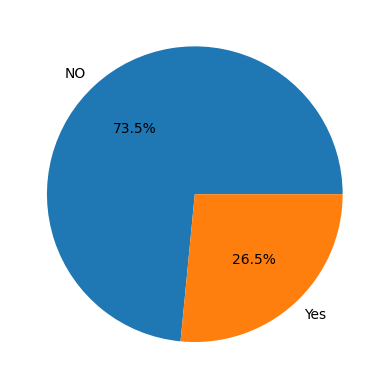

In [13]:
#a)Build a pie-chart to show the distribution of customers would be churning out
plt.pie(df['Churn'].value_counts(),labels=['NO','Yes'],autopct='%0.1f%%')
plt.savefig('Pie_Chart.png')
plt.show()

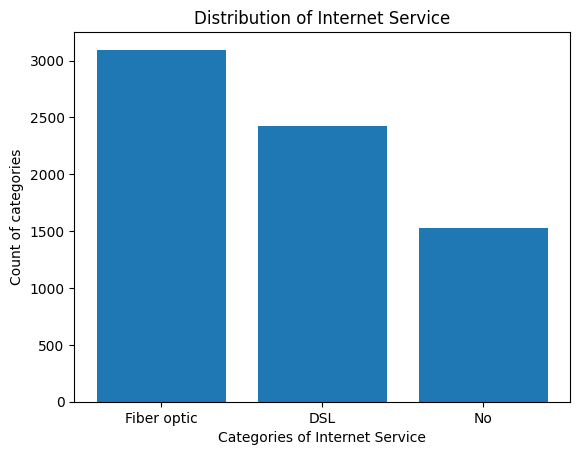

In [14]:
#b)Build a bar-plot to show the distribution of ‘Internet Service’
plt.bar(df['InternetService'].value_counts().index,df['InternetService'].value_counts())
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of categories')
plt.title('Distribution of Internet Service')
plt.savefig('Bar_plot.png')
plt.show()


*** MODEL BUILDING C(a):***

In [15]:
# C(a):
x=df['tenure']
y=df['Churn']
# label encoding
le=LabelEncoder()
y=le.fit_transform(y)
#Splitting the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)



In [16]:
model=Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [18]:
history=model.fit(x_train,y_train,
                  epochs=150,
                  validation_data=(x_test,y_test))

Epoch 1/150
166/166 [==============================] - 4s 9ms/step - loss: 0.5133 - accuracy: 0.7317 - val_loss: 0.5292 - val_accuracy: 0.7354
Epoch 2/150
166/166 [==============================] - 1s 6ms/step - loss: 0.5137 - accuracy: 0.7469 - val_loss: 0.5232 - val_accuracy: 0.7490
Epoch 3/150
166/166 [==============================] - 1s 7ms/step - loss: 0.5122 - accuracy: 0.7533 - val_loss: 0.5215 - val_accuracy: 0.7490
Epoch 4/150
166/166 [==============================] - 2s 11ms/step - loss: 0.5103 - accuracy: 0.7567 - val_loss: 0.5445 - val_accuracy: 0.7490
Epoch 5/150
166/166 [==============================] - 2s 13ms/step - loss: 0.5103 - accuracy: 0.7507 - val_loss: 0.5209 - val_accuracy: 0.7507
Epoch 6/150
166/166 [==============================] - 1s 7ms/step - loss: 0.5100 - accuracy: 0.7584 - val_loss: 0.5207 - val_accuracy: 0.7496
Epoch 7/150
166/166 [==============================] - 1s 3ms/step - loss: 0.5121 - accuracy: 0.7567 - val_loss: 0.5209 - val_accuracy: 0.74

In [19]:
np.mean(model.history.history['val_accuracy'])

0.7489153909683227

In [20]:
y_pred=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred.round())
print(cm)

56/56 [==============================] - 0s 1ms/step
[[1177  121]
 [ 324  139]]


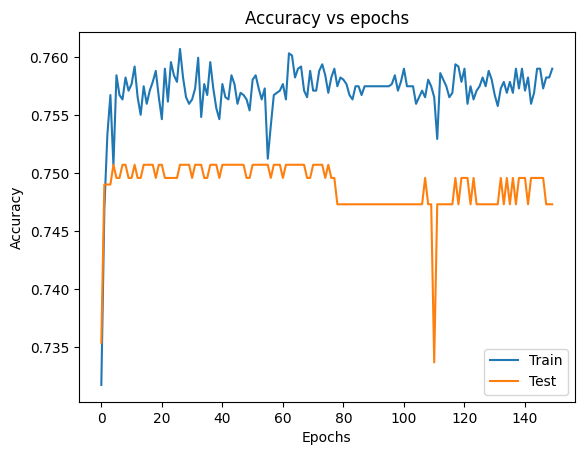

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.savefig('Accuracy1_vs_epochs.png')
plt.show()

**MODEL BUILDING C(b):**

In [22]:
model2=Sequential()
model2.add(Dense(12,input_dim=1,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(8,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))

In [23]:
model2.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [24]:
history=model2.fit(x_train,y_train,
                  epochs=150,
                  validation_data=(x_test,y_test))

Epoch 1/150
166/166 [==============================] - 2s 5ms/step - loss: 2.7830 - accuracy: 0.6374 - val_loss: 1.1048 - val_accuracy: 0.7354
Epoch 2/150
166/166 [==============================] - 1s 3ms/step - loss: 1.6258 - accuracy: 0.6643 - val_loss: 0.6853 - val_accuracy: 0.7479
Epoch 3/150
166/166 [==============================] - 1s 4ms/step - loss: 0.9770 - accuracy: 0.6744 - val_loss: 0.5321 - val_accuracy: 0.7479
Epoch 4/150
166/166 [==============================] - 1s 5ms/step - loss: 0.7301 - accuracy: 0.6937 - val_loss: 0.5234 - val_accuracy: 0.7456
Epoch 5/150
166/166 [==============================] - 1s 5ms/step - loss: 0.6461 - accuracy: 0.7079 - val_loss: 0.5230 - val_accuracy: 0.7371
Epoch 6/150
166/166 [==============================] - 1s 5ms/step - loss: 0.5944 - accuracy: 0.7149 - val_loss: 0.5313 - val_accuracy: 0.7371
Epoch 7/150
166/166 [==============================] - 1s 3ms/step - loss: 0.5809 - accuracy: 0.7088 - val_loss: 0.5295 - val_accuracy: 0.7371

In [25]:
np.mean(model2.history.history['val_accuracy'])

0.7372705149650574

In [26]:
y_pred2=model2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred2.round())
print(cm2)

56/56 [==============================] - 0s 1ms/step
[[1298    0]
 [ 463    0]]


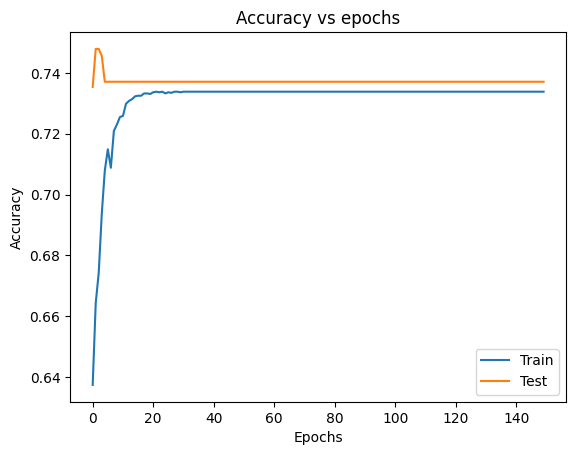

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.savefig('Accuracy2_vs_Epochs2.png')
plt.show()

**MODEL BUILDING: C(c)**

In [28]:
x1=df[['MonthlyCharges','tenure','TotalCharges']]
y1=df[['Churn']]
le=LabelEncoder()
y1=le.fit_transform(y1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=0)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
model3=Sequential()
model3.add(Dense(12,input_dim=3,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [30]:
model3.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [31]:
history=model3.fit(x1_train,y1_train,
                  epochs=150,
                  validation_data=(x1_test,y1_test))

Epoch 1/150
166/166 [==============================] - 2s 5ms/step - loss: 17.4367 - accuracy: 0.6206 - val_loss: 0.9108 - val_accuracy: 0.7490
Epoch 2/150
166/166 [==============================] - 1s 5ms/step - loss: 0.7100 - accuracy: 0.7332 - val_loss: 0.5494 - val_accuracy: 0.7490
Epoch 3/150
166/166 [==============================] - 1s 5ms/step - loss: 0.5314 - accuracy: 0.7518 - val_loss: 0.7443 - val_accuracy: 0.7535
Epoch 4/150
166/166 [==============================] - 1s 5ms/step - loss: 0.5511 - accuracy: 0.7465 - val_loss: 0.5529 - val_accuracy: 0.7558
Epoch 5/150
166/166 [==============================] - 1s 4ms/step - loss: 0.5317 - accuracy: 0.7603 - val_loss: 0.6049 - val_accuracy: 0.7592
Epoch 6/150
166/166 [==============================] - 1s 3ms/step - loss: 0.5279 - accuracy: 0.7624 - val_loss: 1.4274 - val_accuracy: 0.4725
Epoch 7/150
166/166 [==============================] - 1s 3ms/step - loss: 0.5831 - accuracy: 0.7514 - val_loss: 0.5183 - val_accuracy: 0.735

In [32]:
np.mean(model3.history.history['val_accuracy'])

0.7439977238575618

In [33]:
y1_pred_prob = model3.predict(x1_test)
y1_pred = np.argmax(y1_pred_prob, axis=-1)
cm3=confusion_matrix(y1_test,y1_pred)
print(cm3)

56/56 [==============================] - 0s 2ms/step
[[1298    0]
 [ 463    0]]


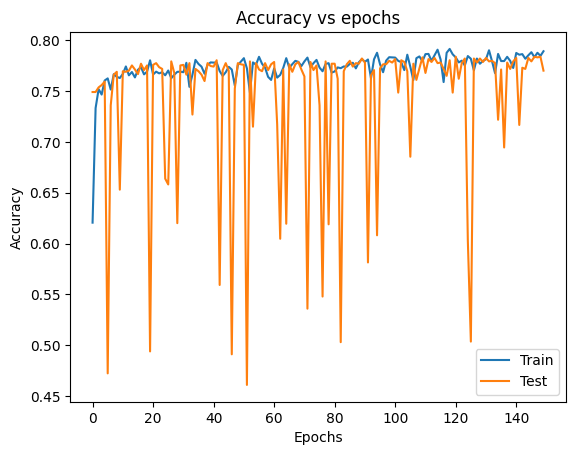

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.savefig('Accuracy3_vs_epochs3.png')
plt.show()